# NYC Taxi Trip Data - Exploratory Data Analysis
## Module 3: Loading and Initial Exploration

**Goal:** Load the taxi data and understand what's inside

**Date:** February 10, 2026

In [6]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__

print(f"✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print("Numpy version: {np.__version__}")
print("Matplotlib version: {plt.__version__}")
print("Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.2.2
Numpy version: {np.__version__}
Matplotlib version: {plt.__version__}
Seaborn version: {sns.__version__}


In [7]:
#3
# ============================================
# DISPLAY SETTINGS (Make output look nice)
# ============================================

# Show more columns when displaying data
pd.set_option('display.max_columns', None)
# "None" means "show ALL columns, don't hide any"

# Show more rows
pd.set_option('display.max_rows', 100)
# Show up to 100 rows at a time

# Make numbers easier to read
pd.set_option('display.float_format', '{:.2f}'.format)
# Show only 2 decimal places (12.5 instead of 12.5000000)

print("✅ Display settings configured!")

✅ Display settings configured!


In [8]:
#4
file_path = r"C:\Users\hunda\OneDrive\Desktop\Syracuse\Masters\Sem 2\IST 707 Applied Machine Learning\ML-Project\data\raw\yellow_tripdata_2025-01.parquet"
df = pd.read_parquet(file_path)
print(f"✅ Loaded {len(df):,} taxi trips")

✅ Loaded 3,475,226 taxi trips


In [9]:
#5
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.00,1.60,1.00,N,229,237,1,10.00,3.50,0.50,3.00,0.00,1.00,18.00,2.50,0.00,0.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.00,0.50,1.00,N,236,237,1,5.10,3.50,0.50,2.02,0.00,1.00,12.12,2.50,0.00,0.00
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.00,0.60,1.00,N,141,141,1,5.10,3.50,0.50,2.00,0.00,1.00,12.10,2.50,0.00,0.00
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.00,0.52,1.00,N,244,244,2,7.20,1.00,0.50,0.00,0.00,1.00,9.70,0.00,0.00,0.00
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.00,0.66,1.00,N,244,116,2,5.80,1.00,0.50,0.00,0.00,1.00,8.30,0.00,0.00,0.00


In [13]:
#6
rows, columns = df.shape
print("📊 Dataset shape")
print(f"We have {rows:,} examples of taxi trip data")
print(f"We have {columns} features in taxi trip data")

📊 Dataset shape
We have 3,475,226 examples of taxi trip data
We have 20 features in taxi trip data


In [20]:
print("Features in the taxi trip data")
for i, column in enumerate(df.columns, 1):
    print(f"{i:2d}. {column}")

Features in the taxi trip data
 1. VendorID
 2. tpep_pickup_datetime
 3. tpep_dropoff_datetime
 4. passenger_count
 5. trip_distance
 6. RatecodeID
 7. store_and_fwd_flag
 8. PULocationID
 9. DOLocationID
10. payment_type
11. fare_amount
12. extra
13. mta_tax
14. tip_amount
15. tolls_amount
16. improvement_surcharge
17. total_amount
18. congestion_surcharge
19. Airport_fee
20. cbd_congestion_fee


In [30]:
# Understanding datatypes
print(f"{df.dtypes}")

print("\n")
# Memory usage by data
memory_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Total memory usage: {memory_mb: .2f} MB")

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
cbd_congestion_fee              float64
dtype: object


Total memory usage:  616.31 MB


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [48]:
# ============================================
# MISSING VALUES (Are there any incomplete trips?)
# ============================================

print("=" * 70)
print("MISSING VALUES ANALYSIS")
print("=" * 70)

# Count missing values in each column
missing_counts = df.isnull().sum()
# isnull() checks each cell: True if empty, False if has value
# sum() counts how many True values (missing) per column

# Calculate percentage missing
missing_percent = (missing_counts / len(df)) * 100
# Divide by total rows, multiply by 100 for percentage

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percent
})
# This creates a table showing both count and percentage

# Only show columns that have missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
# Filter to only rows where Missing_Count is greater than 0

# Sort by highest missing count first
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)
# sort_values() arranges rows by a column
# ascending=False means biggest first

if len(missing_summary) > 0:
    print("Columns with missing values:")
    print(missing_summary)
else:
    print("✅ EXCELLENT! No missing values in any column!")
    
print(f"\nTotal missing values: {missing_counts.sum():,}")

MISSING VALUES ANALYSIS
Columns with missing values:
                      Missing_Count  Percentage
passenger_count              540149       15.54
RatecodeID                   540149       15.54
store_and_fwd_flag           540149       15.54
congestion_surcharge         540149       15.54
Airport_fee                  540149       15.54

Total missing values: 2,700,745


In [50]:
#Statistical summary
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3475226.00,3475226,3475226,2935077.00,3475226.00,2935077.00,3475226.00,3475226.00,3475226.00,3475226.00,3475226.00,3475226.00,3475226.00,3475226.00,3475226.00,3475226.00,2935077.00,2935077.00,3475226.00
mean,1.79,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.30,5.86,2.48,165.19,164.13,1.04,17.08,1.32,0.48,2.96,0.45,0.95,25.61,2.23,0.12,0.48
min,1.00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.00,0.00,1.00,1.00,1.00,0.00,-900.00,-7.50,-0.50,-86.00,-126.94,-1.00,-901.00,-2.50,-1.75,-0.75
25%,2.00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.00,0.98,1.00,132.00,113.00,1.00,8.60,0.00,0.50,0.00,0.00,1.00,15.20,2.50,0.00,0.00
50%,2.00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.00,1.67,1.00,162.00,162.00,1.00,12.11,0.00,0.50,2.45,0.00,1.00,19.95,2.50,0.00,0.75
75%,2.00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.00,3.10,1.00,234.00,234.00,1.00,19.50,2.50,0.50,3.93,0.00,1.00,27.78,2.50,0.00,0.75
max,7.00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.00,276423.57,99.00,265.00,265.00,5.00,863372.12,15.00,10.50,400.00,170.94,1.00,863380.37,2.50,6.75,0.75
std,0.43,NaN,NaN,0.75,564.60,11.63,64.53,69.40,0.70,463.47,1.86,0.14,3.78,2.00,0.28,463.66,0.90,0.47,0.36


In [52]:
# ============================================
# DATA QUALITY CHECK (Finding weird values)
# ============================================

print("=" * 70)
print("POTENTIAL DATA QUALITY ISSUES")
print("=" * 70)

# Check for negative values (impossible!)
print("\n1. NEGATIVE VALUES CHECK:")
print("-" * 50)

if 'trip_distance' in df.columns:
    negative_distance = len(df[df['trip_distance'] < 0])
    print(f"   Trips with negative distance: {negative_distance:,}")
    
if 'fare_amount' in df.columns:
    negative_fare = len(df[df['fare_amount'] < 0])
    print(f"   Trips with negative fare: {negative_fare:,}")

if 'passenger_count' in df.columns:
    zero_passengers = len(df[df['passenger_count'] == 0])
    print(f"   Trips with 0 passengers: {zero_passengers:,}")
    
    max_passengers = df['passenger_count'].max()
    print(f"   Maximum passengers in a trip: {max_passengers}")
    # Taxis usually hold max 4-6 people
    # If this shows 255, it's a data error!

# Check for extreme values
print("\n2. EXTREME VALUES CHECK:")
print("-" * 50)

if 'trip_distance' in df.columns:
    long_trips = len(df[df['trip_distance'] > 100])
    print(f"   Trips over 100 miles: {long_trips:,}")
    # NYC is small - 100+ miles is suspicious!
    
if 'fare_amount' in df.columns:
    expensive_trips = len(df[df['fare_amount'] > 500])
    print(f"   Trips over $500: {expensive_trips:,}")
    # Very expensive - possible but rare!

POTENTIAL DATA QUALITY ISSUES

1. NEGATIVE VALUES CHECK:
--------------------------------------------------
   Trips with negative distance: 0
   Trips with negative fare: 144,118
   Trips with 0 passengers: 24,656
   Maximum passengers in a trip: 9.0

2. EXTREME VALUES CHECK:
--------------------------------------------------
   Trips over 100 miles: 162
   Trips over $500: 55


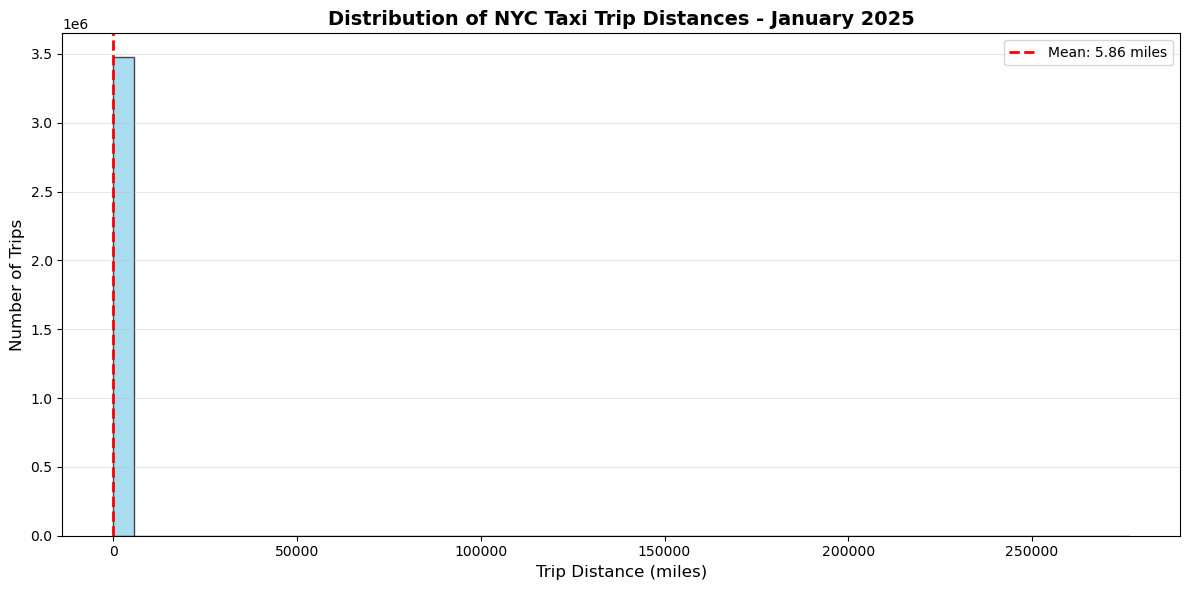

📊 Average trip distance: 5.86 miles


In [53]:
# ============================================
# FIRST VISUALIZATION - Trip Distance Distribution
# ============================================

# Import matplotlib for plotting
# import matplotlib.pyplot as plt

# Create a figure (like a canvas for your graph)
plt.figure(figsize=(12, 6))
# figsize=(12, 6) means 12 inches wide, 6 inches tall

# Create histogram of trip distances
plt.hist(df['trip_distance'], 
         bins=50,           # Split data into 50 groups
         edgecolor='black',  # Black lines between bars
         alpha=0.7,         # Slightly transparent
         color='skyblue')   # Nice blue color

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Distribution of NYC Taxi Trip Distances - January 2025', 
          fontsize=14, fontweight='bold')

# Add grid for easier reading
plt.grid(axis='y', alpha=0.3)
# axis='y' means only horizontal grid lines
# alpha=0.3 makes grid faint

# Add a vertical line at the mean (average)
mean_distance = df['trip_distance'].mean()
plt.axvline(mean_distance, 
            color='red', 
            linestyle='--',     # Dashed line
            linewidth=2, 
            label=f'Mean: {mean_distance:.2f} miles')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # Makes everything fit nicely
plt.show()

print(f"📊 Average trip distance: {mean_distance:.2f} miles")

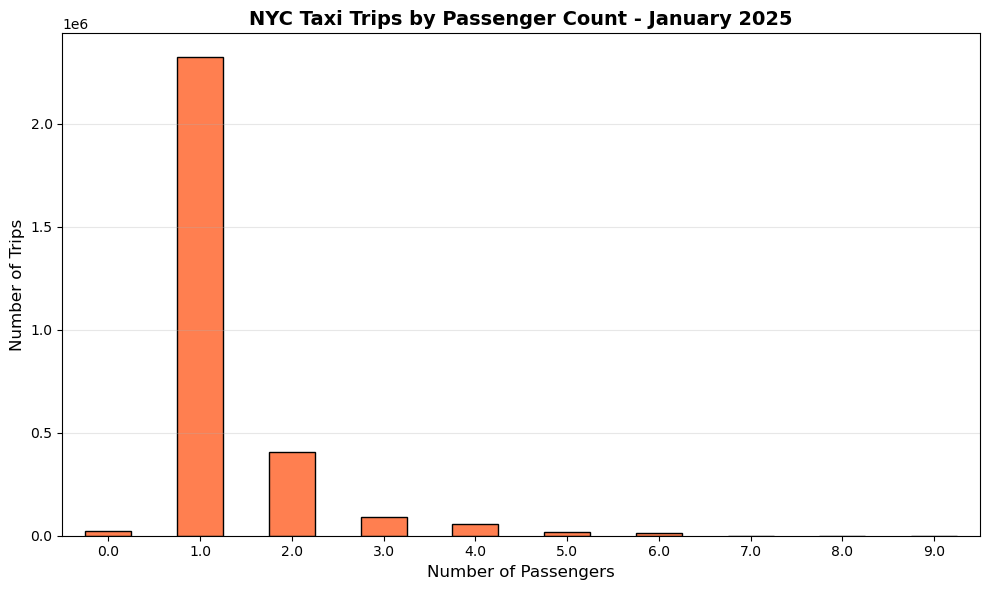


Trips by passenger count:
passenger_count
0.00      24656
1.00    2322434
2.00     407761
3.00      91409
4.00      59009
5.00      17786
6.00      12004
7.00          4
8.00         11
9.00          3
Name: count, dtype: int64


In [54]:
# ============================================
# SECOND VISUALIZATION - Passenger Count
# ============================================

plt.figure(figsize=(10, 6))

# Count how many trips for each passenger count
passenger_counts = df['passenger_count'].value_counts().sort_index()
# value_counts() counts occurrences
# sort_index() arranges by passenger number (1, 2, 3...)

# Create bar chart
passenger_counts.plot(kind='bar', 
                      color='coral', 
                      edgecolor='black')

plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('NYC Taxi Trips by Passenger Count - January 2025', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=0)  # Keep numbers horizontal
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Show the actual numbers
print("\nTrips by passenger count:")
print(passenger_counts)